In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dsignal

%matplotlib inline

In [2]:
def plotsignal(t, v):
    plt.stem(t, v)
    plt.grid()

## Many signal plots

1) $x(n) = 2\delta(n+2) - \delta(n-4)$ for $-5 \le n \le 5$

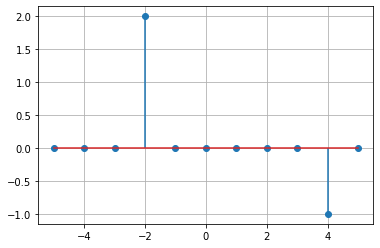

In [3]:
t = np.arange(-5, 6)
x = 2 * dsignal.impseq(-2, -5, 5)
y = dsignal.impseq(4, -5, 5)
plotsignal(t, x - y)

2) $x(n) = n[u(n) - u(n-10)] + 10e^{-0.3(n-10)}[u(n-10) - u(n-20)] \text{ for } 0 \le n \le 20$

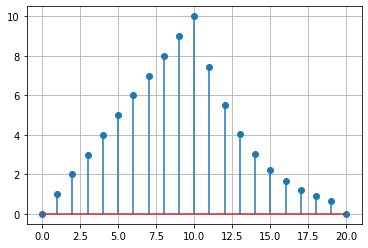

In [4]:
t = np.arange(0, 21)
x1 = (dsignal.stepseq(0,0,20) - dsignal.stepseq(10,0,20))*t
x2 = (dsignal.stepseq(10,0,20) - dsignal.stepseq(20,0,20)) * 10 * np.exp(-0.3*(t-10))
plotsignal(t, x1 + x2)

3) $x(n) = cos(0.04\pi n) + 0.2w(n) \text{    for    } 0 \le n \le 50 $ where $w(n)$ is a Gaussian random sequence with zero mean and unit variance.

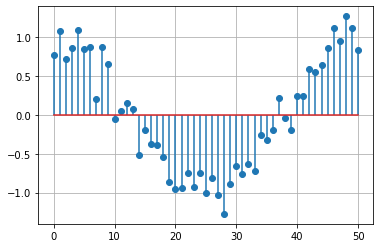

In [5]:
t = np.arange(0, 51)
f = lambda t: np.cos(0.04*np.pi*t)
x = dsignal.genseq(0,50,f) + 0.2*dsignal.randseq(0,50)
plotsignal(t, x)

4) $x(n) = \{\ldots,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,\ldots\}; -10 \le n \le 9$

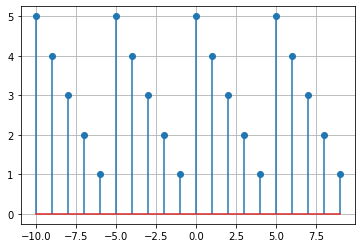

In [6]:
t = np.arange(-10, -5)
x = np.arange(5,0,-1)
t, s = dsignal.sigtile(t, x, 4)
plotsignal(t, s)

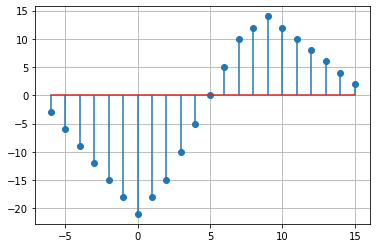

In [7]:
t = np.arange(-2,11)
x = np.concatenate([np.arange(1,7), np.arange(7,0,-1)])
t1, s1 = dsignal.sigshift(t, x, 5)
t2, s2 = dsignal.sigshift(t, x, -4)
t3, s3 = dsignal.sigadd(t1, s1*2, t2, s2*-3)
plotsignal(t3, s3)

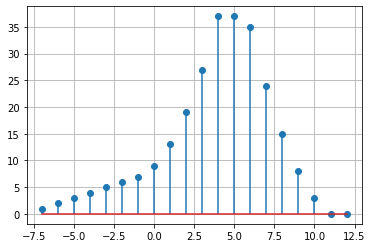

In [8]:
t1, s1 = dsignal.sigfold(t, x); t1, s1 = dsignal.sigshift(t1, s1, 3)
t2, s2 = dsignal.sigshift(t, x, 2); t2, s2 = dsignal.sigmult(t, x, t2, s2)
tr, xr = dsignal.sigadd(t1, s1, t2, s2)
plotsignal(tr, xr)

Generae the complex valued signal

$$ x(n) = e^{(-0.1 + j0.3)n}, -10 \le n \le 10 $$

and plot its magnitude, the real part, and the imaginary part in four separate subplots

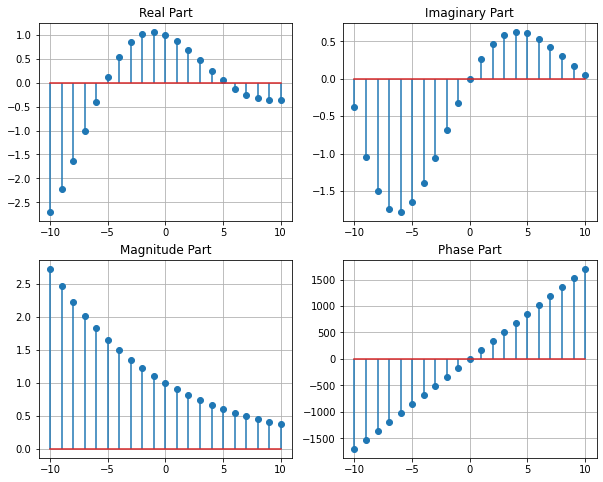

In [9]:
fn = lambda n: np.exp((-0.1 + 0.3j)*n)
t = np.arange(-10, 11)
x = dsignal.genseq(-10, 10, fn)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax[0, 0].stem(t, np.real(x))
ax[0, 0].set_title('Real Part')
ax[0, 0].grid()
ax[0, 1].stem(t, np.imag(x))
ax[0, 1].set_title('Imaginary Part')
ax[0, 1].grid()
ax[1, 0].stem(t, np.abs(x))
ax[1, 0].set_title('Magnitude Part')
ax[1, 0].grid()
ax[1, 1].stem(t, (180*np.pi)*np.angle(x))
ax[1, 1].set_title('Phase Part');
ax[1, 1].grid()

# Convolution

Convolution can be calculated by [numpy.convolve](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html). For example, to calculate the convolution for the following sequences

$ x(n) = [3,11,7,0*,-1,4,2]; -3 \le n \le 3$ and $h(n) = [2,3*,0,-5,2,1]; -1\le n \le4$

The convolution $y(n) = x(n)*h(n)$ can be calculated

In [10]:
tx = np.arange(-3,4)
x = np.array([3,11,7,0,-1,4,2])
th = np.arange(-1,5)
h = np.array([2,3,0,-5,2,1])

In [11]:
np.convolve(x, h)

array([  6,  31,  47,   6, -51,  -5,  41,  18, -22,  -3,   8,   2])

In [12]:
dsignal.conv_m(tx, x, th, h)

(array([-4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]),
 array([  6,  31,  47,   6, -51,  -5,  41,  18, -22,  -3,   8,   2]))